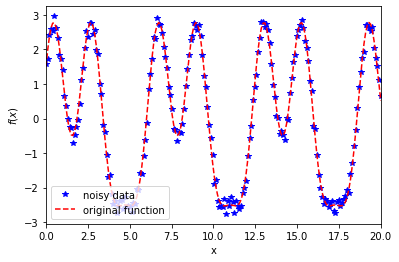

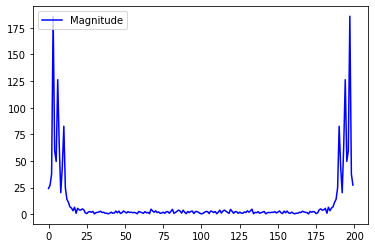

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from cmath import exp, pi

def dft(y):
    '''
    This is a code to do discrete Fourier transform
    '''    
    N = len(y)
    c = np.zeros(N, complex)
    for k in range(N):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c

#define the function
f = lambda x: 2*np.sin(x) + 1.5*np.cos(2*x) + np.sin(3*x)

#define the paramters for the plot
a,b = 0,20
npoints = 200

#create the initial sample points (x,y)
x = np.linspace(a,b,npoints)
y = f(x) + 0.5*(np.random.rand(npoints) - 0.5)

#performat DFT and inverse dft calculations
c = dft(y)    
#y1 = idft(c).real/npoints 

#make the plot
plt.plot(x,y, 'b*', label='noisy data')
plt.plot(x,f(x), 'r--', label='original function')
#plt.plot(x,y1, 'y', label='idft')
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.xlim([a,b])
plt.legend(loc='lower left')
plt.show()

#plot the points after DFT data
fig, ax1 = plt.subplots()
ax1.plot(np.abs(c), 'b-', label='Magnitude')

#ax2 = ax1.twinx()
#ax2.plot(np.angle(c), 'r.-', label='Phase')
ax1.legend(loc='upper left')
#ax2.legend(loc='upper right')
plt.show()

In [7]:
def idft(c):
    '''
    This is a code to do inverse Fourier transform
    '''
    N = len(c)
    y = np.zeros(N, complex)
    for k in range(N):
        for n in range(N):
            y[k] += c[n]*exp(2j*pi*k*n/N)
    return y

In [15]:
print(len(c))
print(c.size)
print(c)

200
200
[ 2.41734644e+01+0.00000000e+00j  2.70820655e+01-3.57681772e+00j
  3.56559237e+01-1.24988845e+01j  1.25627730e+02-1.36893352e+02j
 -9.66056790e+00+5.87223957e+01j  9.28554235e+00+4.86593420e+01j
  4.05627925e+01+1.19560825e+02j -1.37269440e+01-6.29695207e+01j
  1.07354637e+01-1.71313619e+01j  4.44803618e+01+2.42724306e+00j
 -7.60091771e+01-3.22398293e+01j -2.13744751e+01-1.23868892e+01j
 -1.23951096e+01-6.53258849e+00j -8.33487464e+00-7.45034129e+00j
 -5.18390102e+00-4.58860601e+00j -4.29778338e+00-3.91032302e+00j
 -2.92021020e+00-1.52626274e+00j -3.14812231e+00-5.76126405e+00j
  7.78887464e-03-8.74397298e-01j -4.78382878e-01-5.51251845e+00j
 -3.29628314e+00-2.58423676e+00j -3.70985759e+00+8.06205949e-01j
 -2.65705106e+00-4.23218090e+00j -2.10781412e+00-3.67404620e+00j
 -1.18153830e+00-7.28497666e-01j -1.96895061e-01-5.40096626e-01j
  2.08757707e+00+3.54105310e-01j -1.13112801e+00-2.31790069e+00j
 -1.69958591e+00-5.76982141e-01j -4.17675013e-01-2.64054122e+00j
  1.47174912e-01-

In [16]:
c2 = c[np.abs(c)>10]           # remove the small coefficients
print(c2.size)
print(c2)

27
[ 24.17346437  +0.j          27.08206553  -3.57681772j
  35.65592375 -12.49888454j 125.62772979-136.89335246j
  -9.6605679  +58.72239575j   9.28554235 +48.65934203j
  40.56279245+119.56082499j -13.72694398 -62.96952071j
  10.73546368 -17.1313619j   44.48036179  +2.42724306j
 -76.00917713 -32.2398293j  -21.37447509 -12.38688916j
 -12.39510962  -6.53258849j  -8.33487464  -7.45034129j
  -8.33487464  +7.45034129j -12.39510962  +6.53258849j
 -21.37447509 +12.38688916j -76.00917713 +32.2398293j
  44.48036179  -2.42724306j  10.73546368 +17.1313619j
 -13.72694398 +62.96952071j  40.56279245-119.56082499j
   9.28554235 -48.65934203j  -9.6605679  -58.72239575j
 125.62772979+136.89335246j  35.65592375 +12.49888454j
  27.08206553  +3.57681772j]


In [22]:
y2 = idft(c2).real/npoints     # performa inverse DFT
print(len(y2))

27


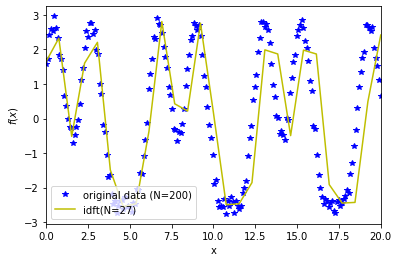

In [8]:
# From the above results, we can clearly see that the DFT coefficients has very uneven distributions.
# A few points has much larger magnitude than the rest. 
# What will happen if we just use these points to do the inverse DFT? 
# Can we recover the overall shape the data from them?

c2 = c[np.abs(c)>10]           # remove the small coefficients
y2 = idft(c2).real/npoints     # performa inverse DFT
x2 = np.linspace(a,b,len(y2))  # obtain the x sequence

plt.plot(x,y, 'b*', label='original data (N='+str(npoints)+')')
plt.plot(x2,y2, 'y', label='idft(N=' + str(len(c2)) + ')')

plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.xlim([a,b])
plt.legend(loc='lower left')
plt.show()